In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import mglearn
import matplotlib.pyplot as plt

In [33]:
X,y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [34]:
y_named = np.array(["blue", "red"])[y]

In [35]:
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X,y_named, y, random_state=0)

In [36]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [37]:
X_test.shape

(25, 2)

In [38]:
clf.decision_function(X_test).shape

(25,)

In [39]:
clf.decision_function(X_test)[:6]

array([ 4.13592629, -1.7016989 , -3.95106099, -3.62599351,  4.28986668,
        3.66166106])

In [40]:
clf.decision_function(X_test) > 0

array([ True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False])

In [41]:
clf.predict(X_test)

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [42]:
greater_zero = (clf.decision_function(X_test) > 0).astype(int)
pred = clf.classes_[greater_zero]

In [43]:
np.all(pred == clf.predict(X_test))

True

In [44]:
decision_function = clf.decision_function(X_test)
np.min(decision_function)

-7.69097177301218

In [45]:
np.max(decision_function)

4.289866676868515

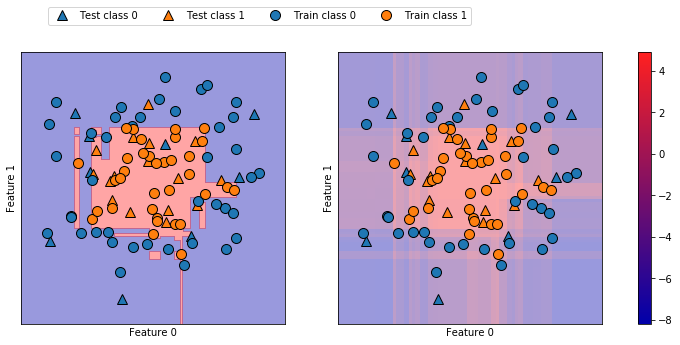

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(clf, X, ax=axes[0], alpha=.4,fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(clf, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:

    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

In [48]:
clf.predict_proba(X_test[:6])

array([[0.01573626, 0.98426374],
       [0.84575649, 0.15424351],
       [0.98112869, 0.01887131],
       [0.97406775, 0.02593225],
       [0.01352142, 0.98647858],
       [0.02504637, 0.97495363]])

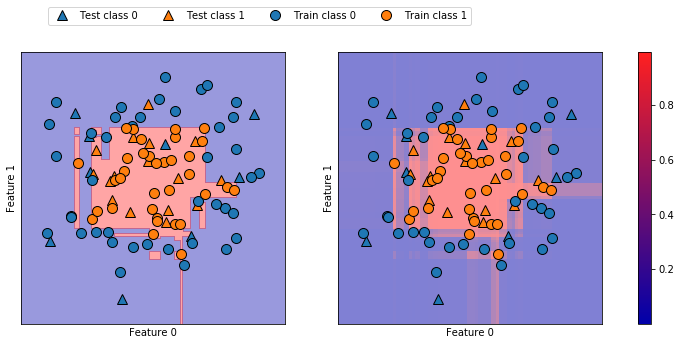

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(clf, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(clf, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0","Train class 1"], ncol=4, loc=(.1, 1.1))